# Dynamic Fare Prediction for Ride-Hailing

**Dynamic pricing has become an essential part of many industries, especially for ride-hailing platforms such as Uber,Ola and similar services. These platforms rely on pricing algorithms to adjust ride costs based on a combination of factors such as demand, distance, Time of Day, Weather Condition and more.**

In [1]:
from IPython.display import Image

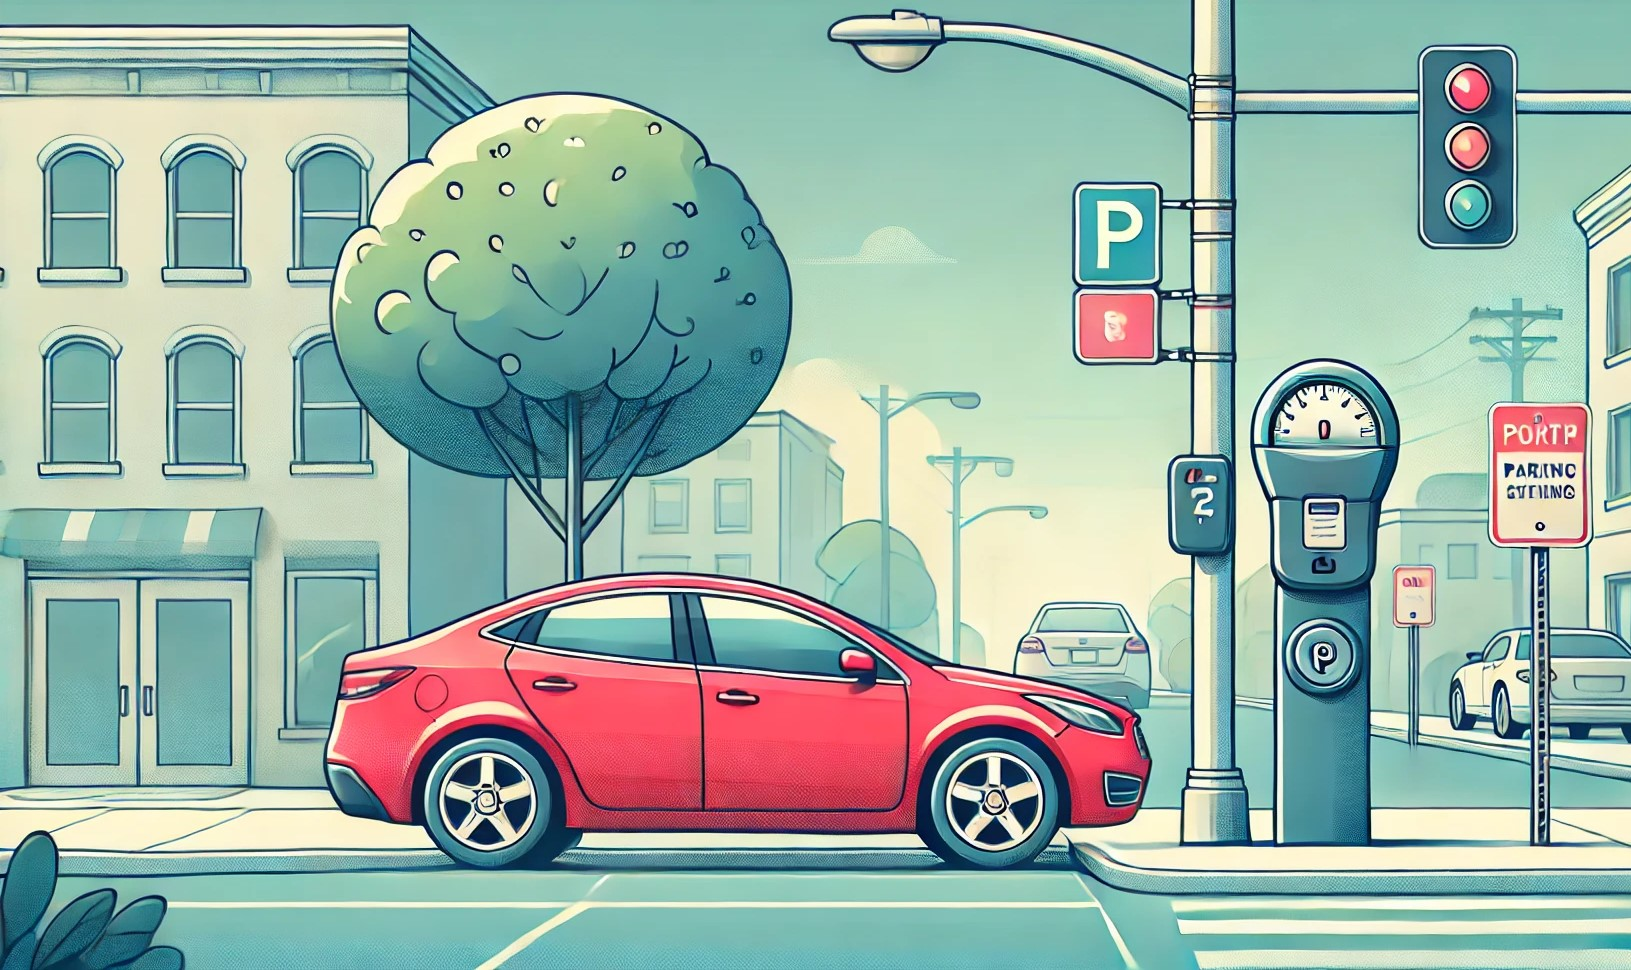

In [3]:
Image(filename='Car Image.jpg')

## Objective:
### To develop a machine learning model to predict ride Fares dynamically, providing fair and accurate pricing that benefits both customers and service providers.

# Load libraries and dataset

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Column summary

Distance - Distance of the ride in kilometers

Time_of_Day - Time of the ride, categorized into Morning, Afternoon, Evening, and Night

Demand - A demand score indicating ride demand during the time period

Weather - Weather conditions (e.g., Clear, Rainy, Snowy)

Base_Price - Base price for the ride in local currency

Weather_Multiplier - A multiplier applied to the base price based on weather conditions

Price - Final price of the ride after applying the weather multiplier and Base Price

In [6]:
data = pd.read_csv("ride_sharing_data.csv")
data

,Distance,Time_of_Day,Demand,Weather,Base_Price,Weather_Multiplier,Price
0,8.116262,Evening,5.671736,Snowy,12,2.0,305.27
1,19.063572,Night,5.312637,Snowy,15,2.0,875.74
2,14.907885,Afternoon,1.230779,Snowy,8,2.0,267.88
3,12.374511,Night,4.071230,Snowy,15,2.0,522.37
4,3.964354,Night,4.421761,Snowy,15,2.0,171.52
...,...,...,...,...,...,...,...
995,2.740059,Morning,5.430929,Rainy,10,1.5,63.42
996,18.428958,Evening,6.195511,Clear,12,1.0,358.16
997,3.599554,Morning,8.790194,Clear,10,1.0,67.64
998,19.054510,Afternoon,9.826654,Rainy,8,1.5,453.34


#  Exploratory Data Analysis

In [7]:
data.head()

,Distance,Time_of_Day,Demand,Weather,Base_Price,Weather_Multiplier,Price
0,8.116262,Evening,5.671736,Snowy,12,2.0,305.27
1,19.063572,Night,5.312637,Snowy,15,2.0,875.74
2,14.907885,Afternoon,1.230779,Snowy,8,2.0,267.88
3,12.374511,Night,4.071230,Snowy,15,2.0,522.37
4,3.964354,Night,4.421761,Snowy,15,2.0,171.52


In [8]:
data.tail()

,Distance,Time_of_Day,Demand,Weather,Base_Price,Weather_Multiplier,Price
995,2.740059,Morning,5.430929,Rainy,10,1.5,63.42
996,18.428958,Evening,6.195511,Clear,12,1.0,358.16
997,3.599554,Morning,8.790194,Clear,10,1.0,67.64
998,19.054510,Afternoon,9.826654,Rainy,8,1.5,453.34
999,9.474110,Night,4.668258,Snowy,15,2.0,416.91


In [9]:
data.shape

(1000, 7)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Distance            1000 non-null   float64
 1   Time_of_Day         1000 non-null   object 
 2   Demand              1000 non-null   float64
 3   Weather             1000 non-null   object 
 4   Base_Price          1000 non-null   int64  
 5   Weather_Multiplier  1000 non-null   float64
 6   Price               1000 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 54.8+ KB


In [11]:
data.describe()

,Distance,Demand,Base_Price,Weather_Multiplier,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,10.314875,5.483440,11.169000,1.491500,263.09109
std,5.550610,2.576445,2.580135,0.412126,182.03787
min,1.088008,1.014086,8.000000,1.000000,14.54000
25%,5.483492,3.310508,8.000000,1.000000,118.85250
50%,10.439340,5.550885,10.000000,1.500000,223.20500
75%,15.142072,7.642966,12.000000,2.000000,366.50500
max,19.994636,9.985128,15.000000,2.000000,1125.45000


# Checking Missing Values

In [12]:
data.isnull().sum()

Distance              0
Time_of_Day           0
Demand                0
Weather               0
Base_Price            0
Weather_Multiplier    0
Price                 0
dtype: int64

# Visualization

## 1) Variation in Average Ride Price Across Different Times of Day

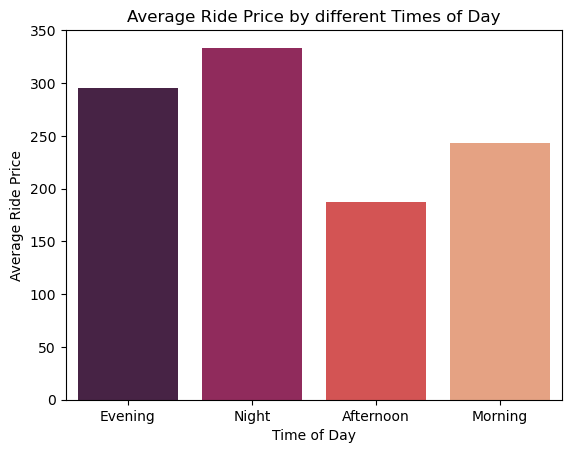

In [13]:
sns.barplot(data=data, x='Time_of_Day', y='Price',palette="rocket",ci=None)

plt.title("Average Ride Price by different Times of Day")
plt.xlabel('Time of Day')
plt.ylabel('Average Ride Price')
plt.show()

**This bar plot illustrates how the average ride price varies throughout the day.**
- Night has the highest average ride price, followed closely by Evening — likely due to higher demand during those hours (e.g., people commuting back, nightlife, fewer drivers).
- Morning rides are moderately priced.
- Afternoon shows the lowest average ride price, possibly due to lower demand during mid-day hours.

## 2) Proportional Impact of Weather Conditions on Average Ride Price (%)

In [23]:
Weather_avg_price = data.groupby("Weather")["Price"].mean()
print(Weather_avg_price)

Weather
Clear    180.755776
Rainy    267.478474
Snowy    345.400272
Name: Price, dtype: float64


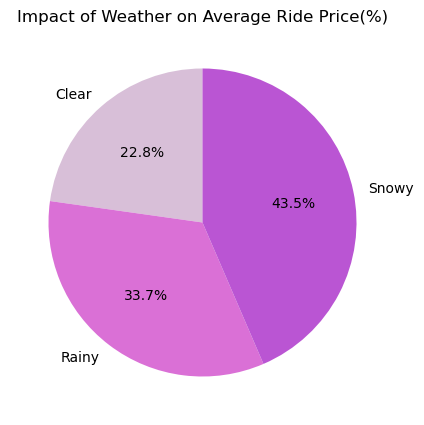

In [25]:
plt.figure(figsize=(5, 5))

plt.pie(Weather_avg_price, labels=Weather_avg_price.index, autopct='%1.1f%%', startangle=90,colors=['#D8BFD8', '#DA70D6', '#BA55D3'])
plt.title("Impact of Weather on Average Ride Price(%)")

plt.show()


**This Pie plot Analyzing Impact of Weather on Average Ride Price(%)**
- Snowy weather leads to the highest average ride price, accounting for 43.5% of the total price distribution.
- Rainy weather contributes 33.7%, indicating a significant increase likely due to slower traffic and higher demand.
- Clear weather has the lowest ride cost, contributing only 22.8% of the average — likely due to favorable driving conditions and consistent supply.



## 3) Distribution of Price (Target Variable)

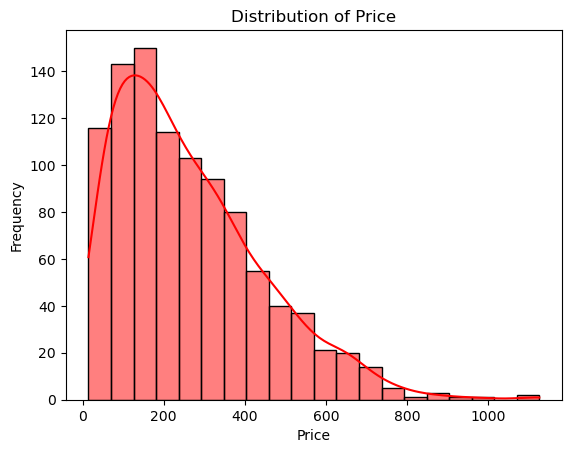

In [27]:
sns.histplot(data['Price'], bins=20, kde=True,color="red")
plt.title("Distribution of Price")
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

**Target Variable (`Price`)**:
   - The distribution of ride price is  **right-skewed**, indicating the presence of high-price rides.
   - The majority of ride-sharing trips are relatively inexpensive, with most prices under ₹300.
   - During poor weather conditions(Snowy) or high-demand periods, prices can surge significantly, reaching up to ₹800+
   - Outliers are observed in the higher range of ride price, which may need to be addressed during preprocessing.


## 4) Impact of Weather on Distance-Price Relationship in Ride Fares

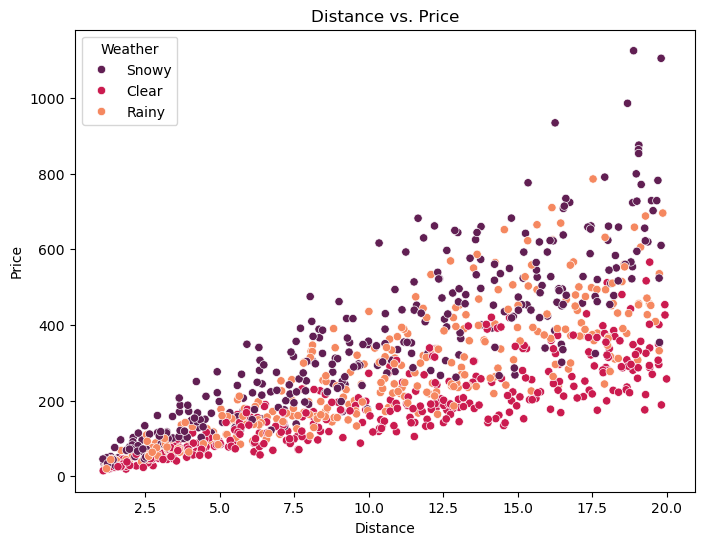

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Distance', y='Price', data=data,hue="Weather",palette="rocket")
plt.title("Distance vs. Price")
plt.show()

**This scatter plot shows the relationship between Distance and Price under different Weather conditions**

- As distance increases, the price also increases — which is expected in ride-fare systems.

**Weather Effect:**
- Snowy conditions (purple) show higher prices for the same distances compared to other conditions. This suggests that adverse weather increases ride costs, possibly due to traffic, demand surges, or safety concerns.
- Rainy conditions (orange) result in moderately higher prices, though less than snowy.
- Clear weather (red) shows the lowest prices overall.

## 5) Effect of Demand and Weather Conditions on Ride Price

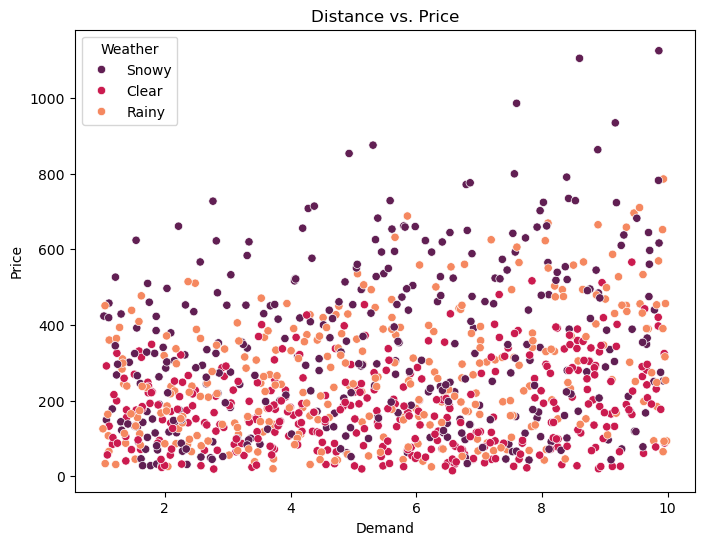

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Demand', y='Price', data=data,hue="Weather",palette="rocket")
plt.title("Distance vs. Price")
plt.show()

**This scatter plot displays how ride prices vary with demand levels, segmented by weather conditions**
- As demand increases, price tends to rise slightly, although the relationship is not strongly linear.

**Weather Impact:**
- Snowy conditions (purple) consistently result in higher prices across all demand levels, suggesting that platforms increase prices more aggressively in bad weather.
- Rainy conditions (orange) also show elevated prices, though less than snowy.
- Clear weather (red) corresponds to the lowest prices, even at higher demand.

# Boxplot Analysis of Ride Price to Detect Outliers

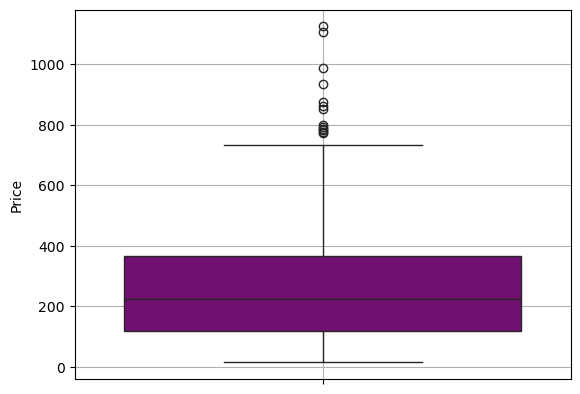

In [33]:
sns.boxplot(data["Price"],color="purple")
plt.grid()

**There are multiple high-price outliers(above 750 units), possibly caused by:**
- Long-distance trips
- High-demand or surge pricing
- Extreme weather conditions.

**These should be investigated further rather than directly removed.**

Outliers in the Price variable can vary significantly depending on weather conditions. Instead of treating all outliers globally, we can segment the data by weather condition and treat the outliers within each group.

## Checking Price Outliers Across Weather Conditions Using Box Plot

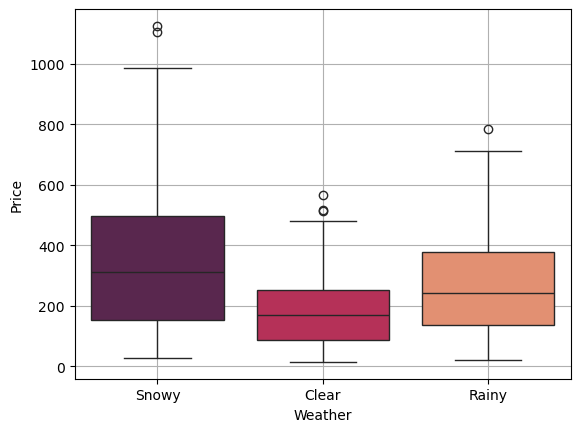

In [35]:
sns.boxplot(data=data,y="Price",x="Weather",palette="rocket")
plt.grid()

# Removing Outliers

In [37]:
def Weather(x,price_threshold):
    Outlier_index=data[(data["Weather"]==x) & (data["Price"]>price_threshold)].index
    data.drop(index=Outlier_index,inplace=True)
    
Weather("Snowy",1000)
Weather("Clear",500)
Weather("Rainy",750)

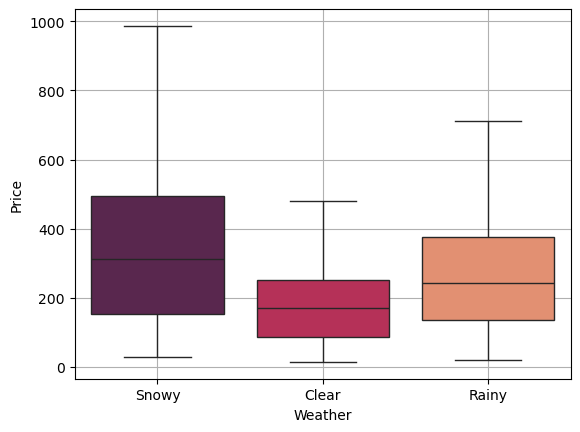

In [39]:
sns.boxplot(data=data,y="Price",x="Weather",palette="rocket")
plt.grid()

In [41]:
data.reset_index(inplace=True,drop=True)

In [43]:
data

,Distance,Time_of_Day,Demand,Weather,Base_Price,Weather_Multiplier,Price
0,8.116262,Evening,5.671736,Snowy,12,2.0,305.27
1,19.063572,Night,5.312637,Snowy,15,2.0,875.74
2,14.907885,Afternoon,1.230779,Snowy,8,2.0,267.88
3,12.374511,Night,4.071230,Snowy,15,2.0,522.37
4,3.964354,Night,4.421761,Snowy,15,2.0,171.52
...,...,...,...,...,...,...,...
989,2.740059,Morning,5.430929,Rainy,10,1.5,63.42
990,18.428958,Evening,6.195511,Clear,12,1.0,358.16
991,3.599554,Morning,8.790194,Clear,10,1.0,67.64
992,19.054510,Afternoon,9.826654,Rainy,8,1.5,453.34


# Splitting data into X(Independent Variable) & Y(Dependent Variable)

In [45]:
X=data.iloc[:,:-1]
X

,Distance,Time_of_Day,Demand,Weather,Base_Price,Weather_Multiplier
0,8.116262,Evening,5.671736,Snowy,12,2.0
1,19.063572,Night,5.312637,Snowy,15,2.0
2,14.907885,Afternoon,1.230779,Snowy,8,2.0
3,12.374511,Night,4.071230,Snowy,15,2.0
4,3.964354,Night,4.421761,Snowy,15,2.0
...,...,...,...,...,...,...
989,2.740059,Morning,5.430929,Rainy,10,1.5
990,18.428958,Evening,6.195511,Clear,12,1.0
991,3.599554,Morning,8.790194,Clear,10,1.0
992,19.054510,Afternoon,9.826654,Rainy,8,1.5


In [47]:
Y=data["Price"]
Y=Y.to_frame()
Y

,Price
0,305.27
1,875.74
2,267.88
3,522.37
4,171.52
...,...
989,63.42
990,358.16
991,67.64
992,453.34


# Seperating Numerical and categorical Variable from "X" 

In [49]:
numerical_cols=X.select_dtypes(include=["float","int"])
numerical_cols

,Distance,Demand,Base_Price,Weather_Multiplier
0,8.116262,5.671736,12,2.0
1,19.063572,5.312637,15,2.0
2,14.907885,1.230779,8,2.0
3,12.374511,4.071230,15,2.0
4,3.964354,4.421761,15,2.0
...,...,...,...,...
989,2.740059,5.430929,10,1.5
990,18.428958,6.195511,12,1.0
991,3.599554,8.790194,10,1.0
992,19.054510,9.826654,8,1.5


In [51]:
categorical_cols=X.select_dtypes(include=["object"])
categorical_cols

,Time_of_Day,Weather
0,Evening,Snowy
1,Night,Snowy
2,Afternoon,Snowy
3,Night,Snowy
4,Night,Snowy
...,...,...
989,Morning,Rainy
990,Evening,Clear
991,Morning,Clear
992,Afternoon,Rainy


# Using Label Encoding for converting categorical Variable into numerical

In [53]:
from sklearn.preprocessing  import LabelEncoder
Le=LabelEncoder() 

for i in categorical_cols:
    categorical_cols[i]=Le.fit_transform(categorical_cols[i])

categorical_cols

,Time_of_Day,Weather
0,1,2
1,3,2
2,0,2
3,3,2
4,3,2
...,...,...
989,2,1
990,1,0
991,2,0
992,0,1


**This will convert Times of Day like:**
- Afternoon - 0
- Evening - 1
- Morning - 2
- Night - 3

**This will convert weather categories like:**
- Clear - 0
- Rainy - 1
- Snowy - 2

In [55]:
X_final=pd.concat((numerical_cols,categorical_cols),axis=1)
X_final

,Distance,Demand,Base_Price,Weather_Multiplier,Time_of_Day,Weather
0,8.116262,5.671736,12,2.0,1,2
1,19.063572,5.312637,15,2.0,3,2
2,14.907885,1.230779,8,2.0,0,2
3,12.374511,4.071230,15,2.0,3,2
4,3.964354,4.421761,15,2.0,3,2
...,...,...,...,...,...,...
989,2.740059,5.430929,10,1.5,2,1
990,18.428958,6.195511,12,1.0,1,0
991,3.599554,8.790194,10,1.0,2,0
992,19.054510,9.826654,8,1.5,0,1


# Correlation Matrix (Correlation Between Independent variables)

In [57]:
Correlation=X_final.corr()
Correlation

,Distance,Demand,Base_Price,Weather_Multiplier,Time_of_Day,Weather
Distance,1.000000,-0.034386,-0.033340,-0.031397,-0.044175,-0.031397
Demand,-0.034386,1.000000,-0.050597,-0.032195,-0.022642,-0.032195
Base_Price,-0.033340,-0.050597,1.000000,0.000159,0.816732,0.000159
Weather_Multiplier,-0.031397,-0.032195,0.000159,1.000000,0.012737,1.000000
Time_of_Day,-0.044175,-0.022642,0.816732,0.012737,1.000000,0.012737
Weather,-0.031397,-0.032195,0.000159,1.000000,0.012737,1.000000


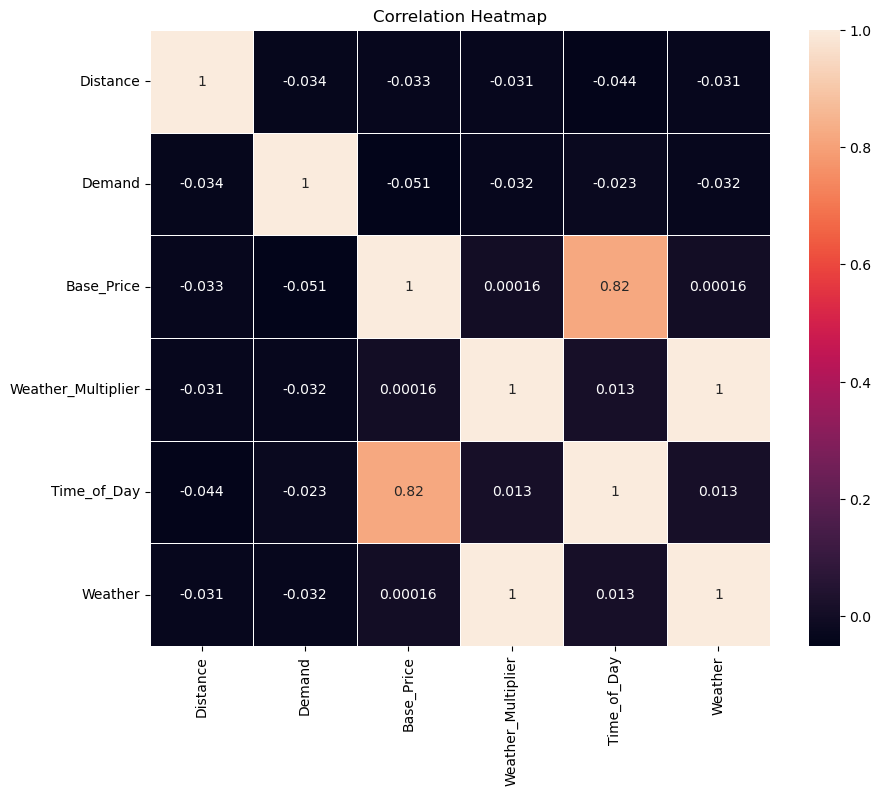

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_final.corr(), annot=True,linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Graph Description**

The Heatmap shows the correlation between independent variables. The color scale indicates the strength and direction of the correlation. For example, a strong positive correlation is shown in white, while a strong negative correlation is shown in black.

Key observations include:

- Weather and Weather_Multiplier: These variables have a strong positive correlation(1),meaning they provide the same information in different formats..
- Base Price and Time of day : There is a also strong correlation (0.82) between Time_of_Day and Base_Price, which indicates a relationship — likely due to time-based fare structures.

# Dropping highly correlated numerical features

In [61]:
X_final.drop(['Weather_Multiplier'],axis=1,inplace=True)
X_final.drop(['Base_Price'],axis=1,inplace=True)

In [63]:
X_final

,Distance,Demand,Time_of_Day,Weather
0,8.116262,5.671736,1,2
1,19.063572,5.312637,3,2
2,14.907885,1.230779,0,2
3,12.374511,4.071230,3,2
4,3.964354,4.421761,3,2
...,...,...,...,...
989,2.740059,5.430929,2,1
990,18.428958,6.195511,1,0
991,3.599554,8.790194,2,0
992,19.054510,9.826654,0,1


In [65]:
Y

,Price
0,305.27
1,875.74
2,267.88
3,522.37
4,171.52
...,...
989,63.42
990,358.16
991,67.64
992,453.34


# Splitting Data into Training & Testing

In [67]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_final,Y,train_size=0.80,random_state=42)

# Fitting Linear Regression Model

In [69]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [70]:
from sklearn.metrics import r2_score

y_test_pred=LR.predict(x_test)

Test_Accuracy=r2_score(y_test,y_test_pred)
print(f"Test Accuracy of Linear Regression is:{round(Test_Accuracy*100,2)}%")


Test Accuracy of Linear Regression is:86.06%


In [73]:
y_train_pred=LR.predict(x_train)

Training_Accuracy=r2_score(y_train,y_train_pred)
print(f"Training Accuracy of Linear Regression is:{round(Training_Accuracy*100,2)}%")


Training Accuracy of Linear Regression is:86.39%


In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE=mean_absolute_error(y_test,y_test_pred)
MSE=mean_squared_error(y_test,y_test_pred)
RMSE=np.sqrt(MSE)

print("MAE:",MAE)
print("RMSE:",RMSE)

MAE: 47.10528937132778
RMSE: 62.052708110165476


In [ ]:
#!pip install xgboost

# Comparing Model Performance

In [77]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score

# List of models
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("XG Boosting", XGBRegressor()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Support Vector Machine", SVR()),
]

# Train-test split
x_train,x_test,y_train,y_test=train_test_split(X_final,Y,train_size=0.80,random_state=42)

# Training and evaluating each model
for name, model in models:
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    
    Accuracy=r2_score(y_test,y_test_pred)*100
    MAE=mean_absolute_error(y_test,y_test_pred)
    MSE=mean_squared_error(y_test,y_test_pred)
    RMSE=np.sqrt(MSE)

    print(f"{name}:")
    print("Accuracy:",Accuracy)
    print("MAE:",MAE)
    print("RMSE:",RMSE)
    print("_____________________________________________________")


Linear Regression:
Accuracy: 86.05592258534676
MAE: 47.10528937132778
RMSE: 62.052708110165476
_____________________________________________________
Ridge Regression:
Accuracy: 86.06371228784553
MAE: 47.076334945216544
RMSE: 62.03537316402623
_____________________________________________________
Lasso Regression:
Accuracy: 86.1162596998777
MAE: 46.84844093725493
RMSE: 61.918309101015254
_____________________________________________________
Decision Tree:
Accuracy: 88.77679403416397
MAE: 32.956180904522604
RMSE: 55.67039639858764
_____________________________________________________
Random Forest:
Accuracy: 96.6535383973963
MAE: 21.655116582914566
RMSE: 30.398963106197527
_____________________________________________________
AdaBoost:
Accuracy: 81.21279193118995
MAE: 59.37450550231742
RMSE: 72.02727256139762
_____________________________________________________
Gradient Boosting:
Accuracy: 97.98935441436065
MAE: 15.934969828628361
RMSE: 23.563164193093055
_______________________________

**Conclusion:**

Based on the comparative analysis of various machine learning models, the XGBoost algorithm demonstrated superior performance in terms of accuracy and robustness, making it the most suitable choice for predicting ride prices in this context.

#### Model Training & Evaluation for XGBoost Model

In [79]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

y_test_pred=xgb.predict(x_test)

Test_Accuracy=r2_score(y_test,y_test_pred)
MAE=mean_absolute_error(y_test,y_test_pred)
MSE=mean_squared_error(y_test,y_test_pred)
RMSE=np.sqrt(MSE)

print(f"Test Accuracy of XG Boosting is:{round(Test_Accuracy*100,2)}%")
print("Mean Absolute Error:",MAE)
print("Root Mean Square Error:",RMSE)


Test Accuracy of XG Boosting is:98.26%
Mean Absolute Error: 14.341631240461341
Root Mean Square Error: 21.89667936840713


#### XGBoost gives the Highest Accuracy - 98.26%

# Making a Predictive System

In [81]:
def prediction():
    Distance=float(input("Enter the Total Distance (km): "))
    Demand=float(input("Enter the Demand (e.g., 1 for low, 10 for high): "))
    Time_of_Day=int(input("Enter the Time of Day : "))                         # {'Afternoon': 0,'Evening': 1,'Morning': 2,'Night': 3}
    Weather=int(input("Enter the Weather Condition : "))                       # {'Clear': 0, 'Rainy': 1,'Snowy': 2}
    
    input_data=[Distance,Demand,Time_of_Day,Weather]
    input_array = np.asarray(input_data).reshape(1, -1)
    
    predict_price=xgb.predict(input_array)
    
    print(f"Estimated Ride Price: ₹ {predict_price[0]:.2f}")
    
prediction()

Enter the Total Distance (km):  10
Enter the Demand (e.g., 1 for low, 10 for high):  5
Enter the Time of Day :  0
Enter the Weather Condition :  0


Estimated Ride Price: ₹ 120.44
